In [4]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
import numpy as np
from time import sleep
from math import pi, cos , sin ,exp ,ceil
from IPython import display
from matplotlib import cm

In [5]:
ratio = 1 #width/heigh
Re = 1
N = 20
tolerance = 0.0001

In [6]:
u = 1
WI = 1
wi = 1
he = wi/ratio
x = np.linspace(0,wi,N)
y = np.flip(np.linspace(0,he,N))
x, y = np.meshgrid(x, y)
omega = np.zeros((N, N))
psi = np.zeros((N, N))
hx = wi/(N-1)
hy = he/(N-1)
delT = 0.25/(1/(Re*hy**2)+1/(Re*hx**2)) #0.25 can go up to 0.5 max to remain stable

In [7]:
ee = True
num = 0
while(ee):
    s1 = omega.copy()
    for i in range(N):
        omega[i,0] = (-2/hx**2)*(psi[i,1]-psi[i,0]) 
        omega[i,N-1] = (-2/hx**2)*(psi[i,N-2]-psi[i,N-1])
        omega[N-1,i] = (-2/hy**2)*(psi[N-2,i]-psi[N-1,i]) 
        omega[0,i] = (-2/hy**2)*(psi[1,i]-psi[0,i]) -2*u/hy
    OMEGA = omega.copy()
    PSI = psi.copy()
    for i in range(1,N-1):
        for j in range(1,N-1):
            OMEGA[i,j] = omega[i,j]+delT*(((psi[i-1,j]-psi[i+1,j])*(omega[i,j-1]-omega[i,j+1])+(psi[i,j+1]-psi[i,j-1])*(omega[i-1,j]-omega[i+1,j]))/(4*hx**2)+(omega[i,j+1]+omega[i,j-1]+omega[i-1,j]+omega[i+1,j]-4*omega[i,j])/(Re*hx**2))
            
            PSI[i,j] = 0.25*(psi[i,j+1]+psi[i,j-1]+psi[i-1,j]+psi[i+1,j]+OMEGA[i,j]*hx**2)
    omega = OMEGA.copy()
    psi = PSI.copy()
    er = np.average(np.absolute(s1-omega))
    if(er<tolerance):
        ee = False
    num +=1
print(er,num)

9.95609893613506e-05 382


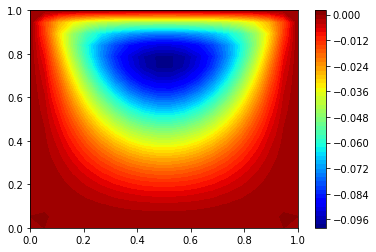

In [8]:
plt.contourf(x,y,psi, cmap=cm.jet,levels = 60)
plt.colorbar()
plt.show()

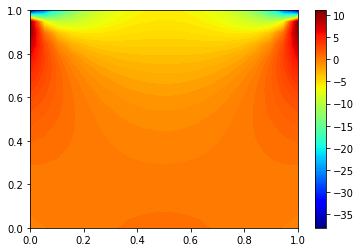

In [9]:
plt.contourf(x,y,omega, cmap=cm.jet,levels = 100)
plt.colorbar()
plt.show()

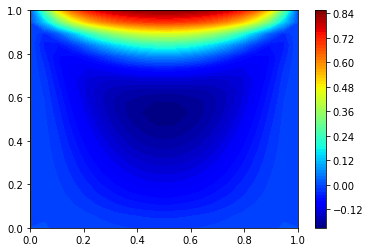

In [10]:
vx = np.zeros([N,N])
vy = np.zeros([N,N])
for i in range(N):
    vx[:,i] = np.gradient(psi[:,i],hy) 
    vy[i,:] = -np.gradient(psi[i,:],hx)
plt.contourf(x,y,-vx, cmap=cm.jet,levels = 100)
plt.colorbar()
plt.show()

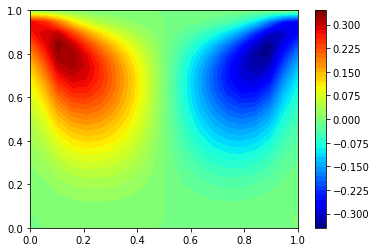

In [11]:
plt.contourf(x,y,vy, cmap=cm.jet, levels = 60)
plt.colorbar()
plt.show()

In [32]:
p = np.zeros([N,N])

# bottom p[N-1,i]
p[N-1,2] = -(1/Re)*(hx/hy)*(-3*omega[N-1,1]+4*omega[N-2,1]-omega[N-3,1])
p[N-1,1] = -(1/Re)*(0.5*hx/hy)*(-3*omega[N-1,1]+4*omega[N-2,1]-omega[N-3,1])
for i in range(3,N):
    p[N-1,i] = p[N-1,i-2]-(1/Re)*(hx/hy)*(-3*omega[N-1,i-1]+4*omega[N-2,i-1]-omega[N-3,i-1])
    
    
#left p[i,0]
p[N-2,0] = (1/Re)*(0.5*hx/hy)*(-3*omega[N-2,1]+4*omega[N-2,2]-omega[N-2,3])
p[N-3,0] = (1/Re)*(hx/hy)*(-3*omega[N-2,1]+4*omega[N-2,2]-omega[N-2,3])
for i in range(3,N):
    p[N-1-i,0] = p[N-3-i,0]+(1/Re)*(hx/hy)*(-3*omega[N-2-i,0]+4*omega[N-2-i,1]-omega[N-2-i,2])

#top
p[0,1] = -(1/Re)*(0.5*hx/hy)*(-3*omega[0,1]+4*omega[1,1]-omega[2,1])
p[0,2] = -(1/Re)*(hx/hy)*(-3*omega[0,1]+4*omega[1,1]-omega[2,1])
for i in range(3,N):
    p[0,i] = p[0,i-2]-(1/Re)*(hx/hy)*(-3*omega[0,i-1]+4*omega[1,i-1]-omega[2,i-1])

# rigth boundary p[i,N-1]
p[N-2,N-1] = (1/Re)*(0.5*hx/hy)*(-3*omega[N-2,N-1]+4*omega[N-2,N-2]-omega[N-2,N-3])
p[N-3,N-1] = (1/Re)*(hx/hy)*(-3*omega[N-2,N-1]+4*omega[N-2,N-2]-omega[N-2,N-3])
for i in range(3,N):
    p[N-1-i,N-1] = p[N-3-i,N-1]+(1/Re)*(hx/hy)*(-3*omega[N-2-i,N-1]+4*omega[N-2-i,N-2]-omega[N-2-i,N-3])


    
for k in range(100):
    P = p.copy()
    for i in range(1,N-1):
        for j in range(1,N-1):
            hl = (0.5/hx)*((psi[i-1,j+1]-psi[i+1,j+1]-psi[i-1,j-1]+psi[i+1,j-1])/(2*hy))
            rhs = 2*(((psi[i,j+1]-2*psi[i,j]+psi[i,j-1])/hx**2)*((psi[i-1,j]-2*psi[i,j]+psi[i+1,j])/hy**2)-(hl)**2)
            P[i,j] = (hx*hx*hy*hy/(2*hx*hx+2*hy*hy))*((p[i,j+1]+p[i,j-1])/(hx**2)+(p[i-1,j]+p[i+1,j])/(hy**2)-rhs)
    p = P.copy()
    
    



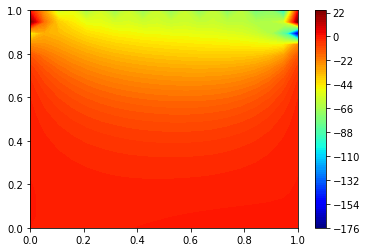

In [33]:
plt.contourf(x,y,p, cmap=cm.jet, levels = 100)
plt.colorbar()
plt.show()